# FIFA 23 Players Value Prediction
### By Sravanth Chowdary Potluri

In [19]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We manually remove some columns that are unnecessary for our prediction using another python script and load the final dataset.

In [20]:
# reading the dataset
df = pd.read_csv('Fifa 23 Players Data Reduced.csv')

In [21]:
# displaying the first 5 rows of the dataset
df.head()

,Known As,Full Name,Overall,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total
0,L. Messi,Lionel Messi,91,54000000,RW,CAM,Argentina,35,169,67,...,RW,10,Low,Low,81,89,90,94,34,64
1,K. Benzema,Karim Benzema,91,64000000,"CF,ST",CF,France,34,185,81,...,ST,19,Medium,Medium,80,88,83,87,39,78
2,R. Lewandowski,Robert Lewandowski,91,84000000,ST,ST,Poland,33,185,81,...,ST,9,High,Medium,75,91,79,86,44,83
3,K. De Bruyne,Kevin De Bruyne,91,107500000,"CM,CAM",CM,Belgium,31,181,70,...,RF,7,High,High,74,88,93,87,64,77
4,K. Mbappé,Kylian Mbappé,91,190500000,"ST,LW",ST,France,23,182,73,...,ST,10,High,Low,97,89,80,92,36,76


/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_99549/3184992021.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_99549/3184992021.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<AxesSubplot: >

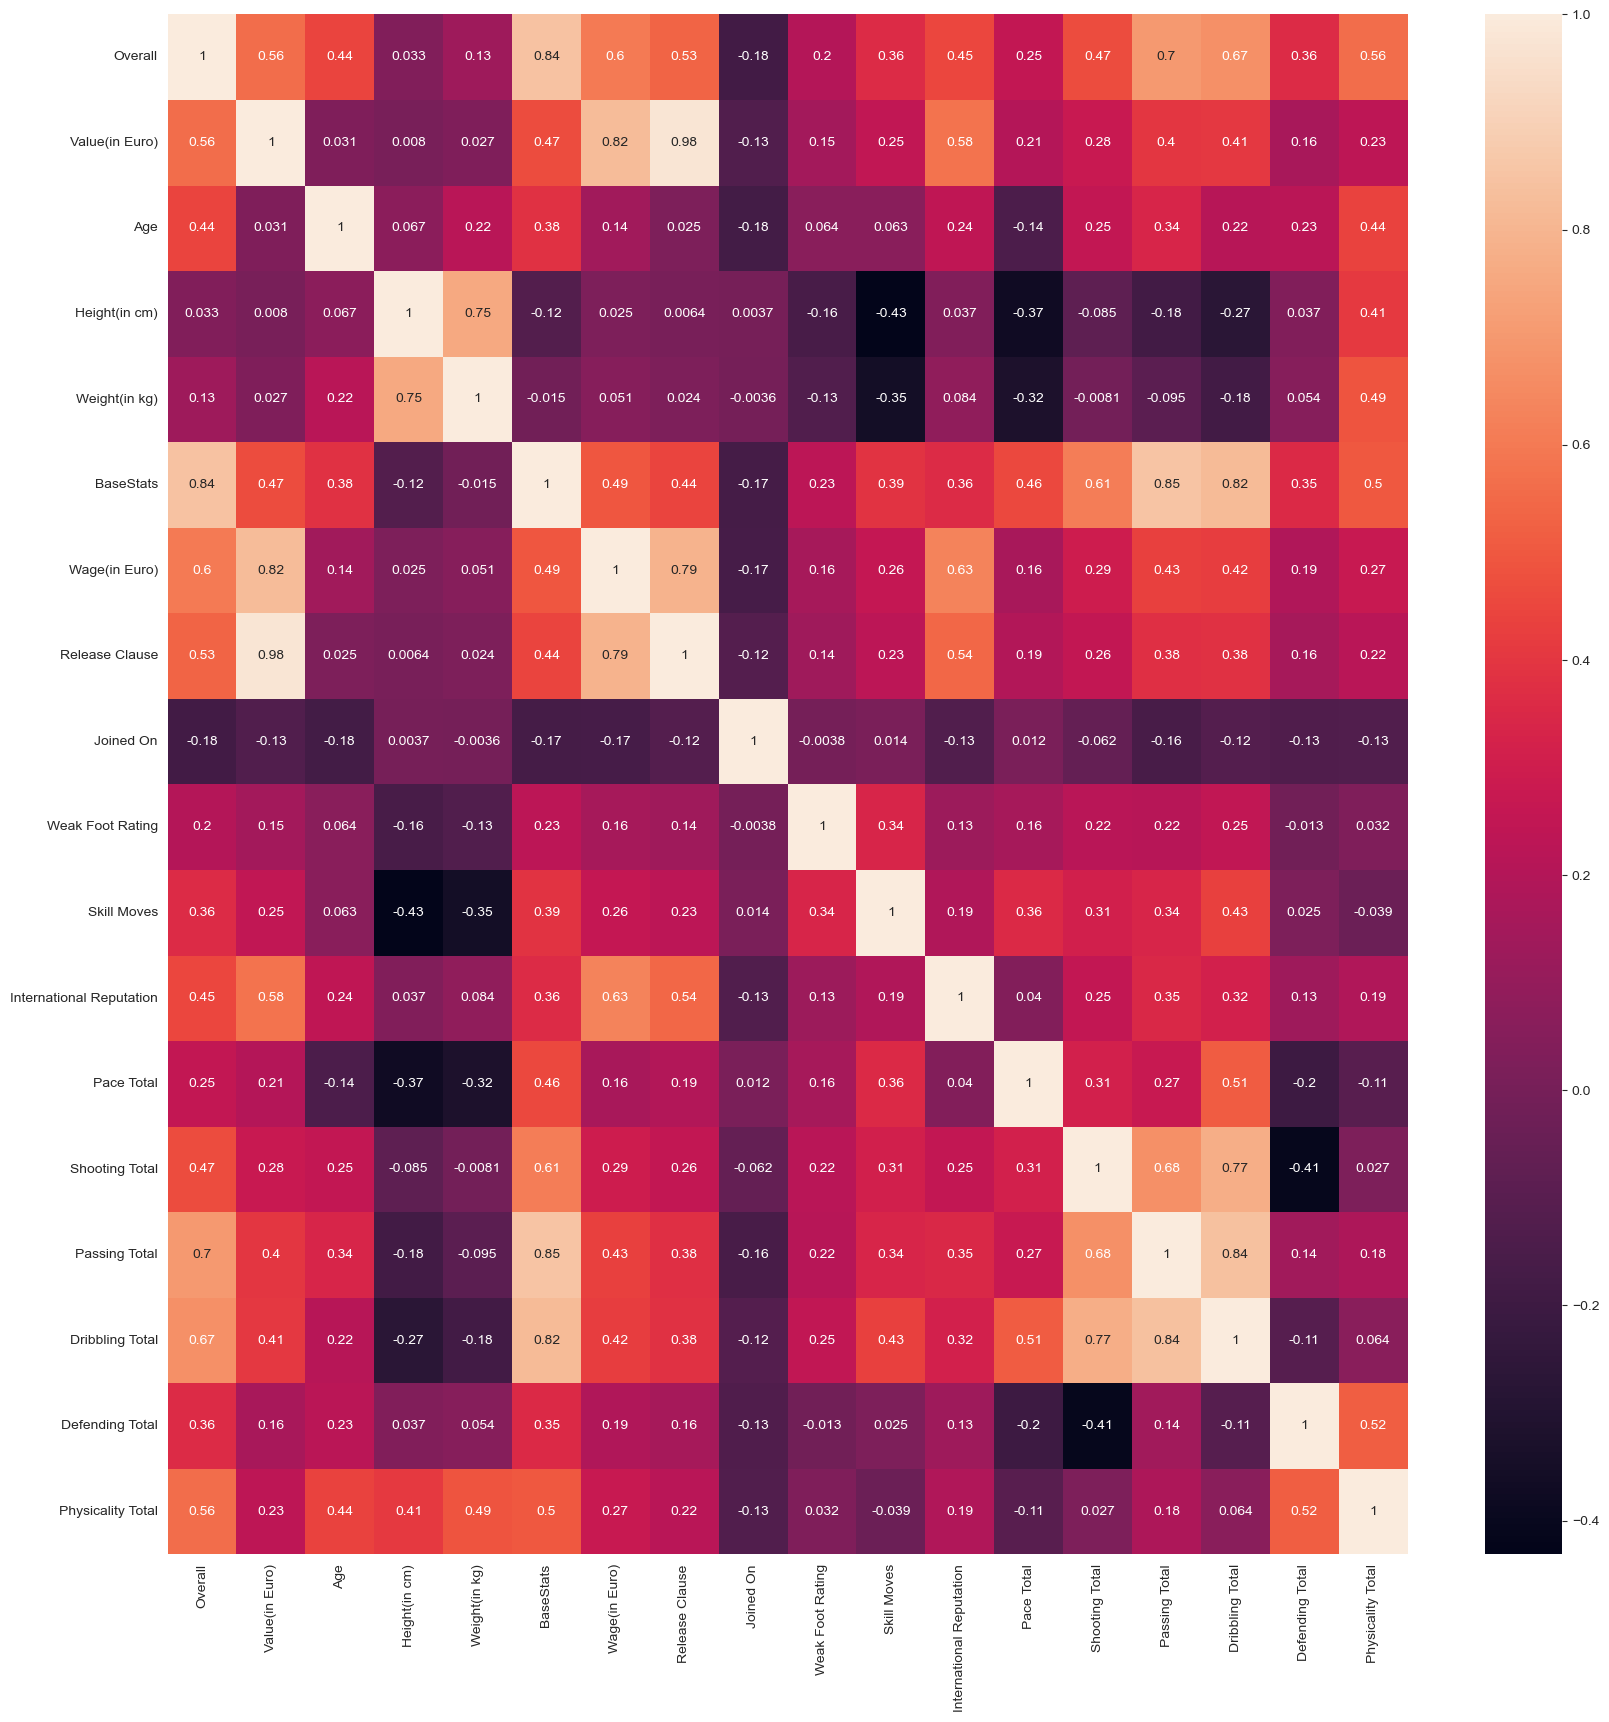

In [22]:
# finding the correlation between the columns
df.corr()
# displaying the correlation using heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

In [23]:
# showing only the correlations for the column Value(in Euro)
df.corr()['Value(in Euro)'].sort_values(ascending = False)

/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_99549/2205239663.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Value(in Euro)'].sort_values(ascending = False)


Value(in Euro)              1.000000
Release Clause              0.976244
Wage(in Euro)               0.822262
International Reputation    0.576023
Overall                     0.561642
BaseStats                   0.468076
Dribbling Total             0.406424
Passing Total               0.399985
Shooting Total              0.275255
Skill Moves                 0.248421
Physicality Total           0.234945
Pace Total                  0.205576
Defending Total             0.163425
Weak Foot Rating            0.146286
Age                         0.030662
Weight(in kg)               0.027106
Height(in cm)               0.008028
Joined On                  -0.127187
Name: Value(in Euro), dtype: float64

We chose the columns chosen below by experimenting with different combinations of columns and finding out the best accuracy.

In [24]:
# seperating out the required columns
df1 = df[['Value(in Euro)','Release Clause','Wage(in Euro)','Overall','International Reputation','Dribbling Total']]

In [26]:
# displaying the first 5 rows of the dataset
df1.head()

,Value(in Euro),Release Clause,Wage(in Euro),Overall,International Reputation,Dribbling Total
0,54000000,99900000,195000,91,5,94
1,64000000,131199999,450000,91,4,87
2,84000000,172200000,420000,91,5,86
3,107500000,198900000,350000,91,4,87
4,190500000,366700000,230000,91,4,92


In [27]:
# displaying the data types of the columns
df1.dtypes

Value(in Euro)              int64
Release Clause              int64
Wage(in Euro)               int64
Overall                     int64
International Reputation    int64
Dribbling Total             int64
dtype: object

In [28]:
# finding out the number of null values in each column
df1.isnull().sum()

Value(in Euro)              0
Release Clause              0
Wage(in Euro)               0
Overall                     0
International Reputation    0
Dribbling Total             0
dtype: int64

In [29]:
# dropping the rows with null values
df1.dropna(inplace = True)

/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_99549/142459961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace = True)


In [30]:
# resetting the index
df1.reset_index(drop = True, inplace = True)

In [31]:
# displaying the datatypes of the columns
df1.dtypes

Value(in Euro)              int64
Release Clause              int64
Wage(in Euro)               int64
Overall                     int64
International Reputation    int64
Dribbling Total             int64
dtype: object

In [32]:
df1

,Value(in Euro),Release Clause,Wage(in Euro),Overall,International Reputation,Dribbling Total
0,54000000,99900000,195000,91,5,94
1,64000000,131199999,450000,91,4,87
2,84000000,172200000,420000,91,5,86
3,107500000,198900000,350000,91,4,87
4,190500000,366700000,230000,91,4,92
...,...,...,...,...,...,...
18534,110000,193000,500,47,1,51
18535,90000,158000,500,47,1,47
18536,130000,332000,500,47,1,52
18537,100000,218000,500,47,1,32


In [34]:
df1.dtypes

Value(in Euro)              int64
Release Clause              int64
Wage(in Euro)               int64
Overall                     int64
International Reputation    int64
Dribbling Total             int64
dtype: object

In [35]:
# seperating the value(in Euro) column
df2 = df1['Value(in Euro)']

In [36]:
# dropping the value(in Euro) column
df1.drop('Value(in Euro)', axis = 1, inplace = True)

/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_99549/1827753589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('Value(in Euro)', axis = 1, inplace = True)


In [37]:
# displaying both the datasets
df1.head()

,Release Clause,Wage(in Euro),Overall,International Reputation,Dribbling Total
0,99900000,195000,91,5,94
1,131199999,450000,91,4,87
2,172200000,420000,91,5,86
3,198900000,350000,91,4,87
4,366700000,230000,91,4,92


In [38]:
df2.head()

0     54000000
1     64000000
2     84000000
3    107500000
4    190500000
Name: Value(in Euro), dtype: int64

In [39]:
# dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size = 0.2, random_state = 42)


In [40]:
X_train

,Release Clause,Wage(in Euro),Overall,International Reputation,Dribbling Total
1127,0,48000,76,2,75
6725,1600000,6000,68,1,64
4966,1600000,8000,70,1,49
1799,11400000,13000,75,1,59
4484,2200000,18000,70,1,72
...,...,...,...,...,...
11284,919000,2000,64,1,53
11964,0,2000,63,1,64
5390,750000,6000,69,1,46
860,20000000,46000,77,2,79


In [41]:
X_test

,Release Clause,Wage(in Euro),Overall,International Reputation,Dribbling Total
10157,3600000,500,65,1,57
3617,3600000,30000,72,1,73
4894,4600000,5000,70,1,72
2315,16800000,16000,74,1,69
2177,0,11000,74,2,75
...,...,...,...,...,...
9049,1600000,500,66,1,61
14757,1600000,1000,61,1,63
6779,4099999,5000,68,1,68
3269,5100000,1000,72,1,71


In [42]:
y_train

1127      9000000
6725      1200000
4966      1100000
1799      6000000
4484      1300000
           ...   
11284      525000
11964      700000
5390       375000
860      10500000
15795      220000
Name: Value(in Euro), Length: 14831, dtype: int64

In [43]:
y_test

10157    1500000
3617     1900000
4894     2100000
2315     8000000
2177     5000000
          ...   
9049      725000
14757     800000
6779     2500000
3269     2300000
11602     500000
Name: Value(in Euro), Length: 3708, dtype: int64

In [44]:
# performing decision tree regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [45]:
# predicting the values
y_pred = regressor.predict(X_test)

In [46]:
# finding out the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9618881766964017

In [47]:
# performing random forest regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [48]:
# predicting the values
y_pred = regressor.predict(X_test)

In [49]:
# finding out the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9870499768822797

In [51]:
# performing linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [52]:
# predicting the values
y_pred = regressor.predict(X_test)

In [53]:
# finding out the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9624799747004392

# Conclusion
After preprocessing the data by using feature engineering and removing the unnecessary columns and keeping only the columns that give the best accuracy, we performed three different regression algorithms and found out that the random forest regression algorithm gave the best R-Score of 98.7%